In [ ]:
import os
import sys
import pyreadr
import pickle
import time
from spaPCA_py.SpatialPCA_buildKernel import build_kernel
from spaPCA_py.SpatialPCA_EstimateLoading import spatialPCA_estimate_loading
from spaPCA_py.SpatialPCA_SpatialPCs import SpatialPCA_SpatialPCs
from spaPCA_py.utilis import *

cbp_spatialpca = [
    "#66CDAA",  
    "#D2691E",  
    "#1E90FF",  
    "#F0E442",  
    "#228B22",  
    "#ADD8E6",  
    "#DDA0DD"   
]

print(os.getcwd())

/Users/eugene/SpaPCA_python


In [2]:
def spacialPCA(normalized_expr, location, bandwidth):
    print('===Step 2: Building Kernel...===')
    s_time = time.time()
    kernelmat = build_kernel(location, bandwidth_set_by_user=bandwidth)
    e_time = time.time()
    print(f"done in {e_time-s_time}s\n")

    print('===Step 3: Estimating loading...===')
    s_time = time.time()
    results_dict = spatialPCA_estimate_loading(kernelmat, location.to_numpy(), normalized_expr.to_numpy(), maxiter=300, SpatialPCnum=20, fast=False)
    e_time = time.time()
    print(f"done in {e_time-s_time}s\n")

    print('===Step 4: Calculating final PCs...===')
    s_time = time.time()
    pca_obj = SpatialPCA_SpatialPCs(results_dict, fast=False, eigenvecnum=20)
    e_time = time.time()
    print(f"done in {e_time-s_time}s\n")

    f_save = open('dlpfc_pyenv.pkl', 'wb')
    pickle.dump(dict, f_save)
    f_save.close()
    
    return pca_obj

## DLPFC

In [3]:
data_path = "/Users/eugene/SpaPCA_python/pro_data/DLPFC"

print("===Step 1: loading normalized data===")
normalized_expr = pyreadr.read_r(os.path.join(data_path, "norm_exp_dlpfc.rds"))[None]
location = pyreadr.read_r(os.path.join(data_path, "location_dlpfc.rds"))[None]
truth = pyreadr.read_r(os.path.join(data_path, "truth_dlpfc.rds"))[None]
print(f"size of data: {normalized_expr.shape}\n")

pca_obj = spacialPCA(normalized_expr, location, bandwidth=0.15377963829946)

print("===Visualizaton===")
obj_with_cluster = cluster_SpatialPCs(pca_obj, n_clusters=7, n_init=10, max_iter=30)

===Step 1: loading normalized data===
size of data: (500, 2000)

===Step 2: Building Kernel...===
done in 0.03263282775878906s

===Step 3: Estimating loading...===
Eigen decomposition on kernel matrix!
Using all eigenvectors and eigenvalues in the Kernel matrix!
done in 148.60704898834229s

===Step 4: Calculating final PCs...===
done in 2.271949052810669s

===Visualizaton===


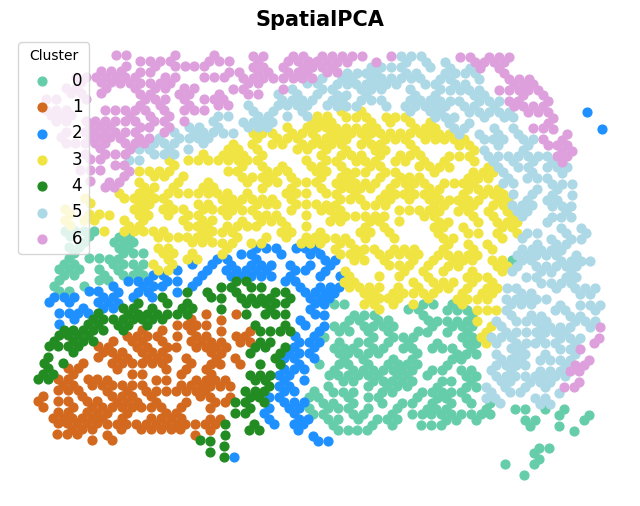

In [14]:
spa_fig = plot_cluster(location=location.values, clusterlabel=obj_with_cluster['cluster_labels'], 
            pointsize=40, text_size=15, title_in="SpatialPCA", 
            color_in=cbp_spatialpca, legend="right")

spa_fig.savefig("fig/spatialpca_dlpfc_py.png", dpi=300, bbox_inches="tight")

## Tumor

In [17]:
data_path = "pro_data/breast_tumor"

print("===Step 1: loading normalized data===")
normalized_expr = pyreadr.read_r(os.path.join(data_path, "tumor_data.rds"))[None]
location = pyreadr.read_r(os.path.join(data_path, "tumor_location.rds"))[None]
print(f"size of data: {normalized_expr.shape}\n")

pca_obj = spacialPCA(normalized_expr, location, bandwidth=0.0288665079125671)

print("===Visualizaton===")
obj_with_cluster = cluster_SpatialPCs(pca_obj, n_clusters=7, n_init=10, max_iter=30)

===Step 1: loading normalized data===
size of data: (1562, 607)

===Step 2: Building Kernel...===
done in 0.01284480094909668s

===Step 3: Estimating loading...===
Eigen decomposition on kernel matrix!
Using all eigenvectors and eigenvalues in the Kernel matrix!
done in 119.97980809211731s

===Step 4: Calculating final PCs...===
done in 0.5556800365447998s

===Visualizaton===


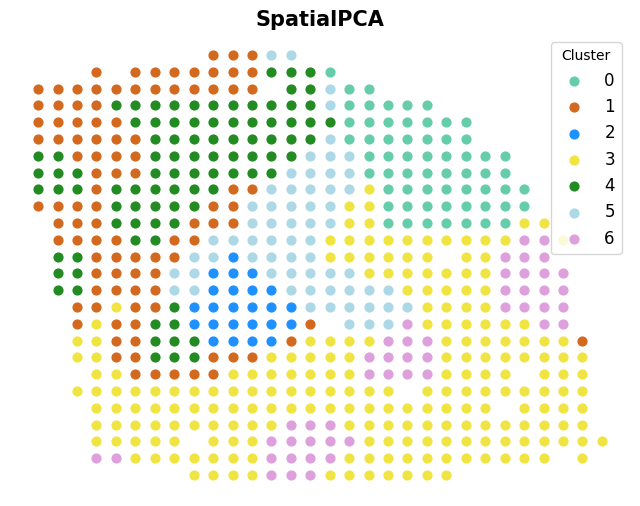

In [18]:
spa_fig = plot_cluster(
    location=location.values,
    clusterlabel=obj_with_cluster["cluster_labels"],
    pointsize=40,
    text_size=15,
    title_in="SpatialPCA",
    color_in=cbp_spatialpca,
    legend="right",
)

spa_fig.savefig("fig/spatialpca_breast_py.png", dpi=300, bbox_inches="tight")